<a href="https://colab.research.google.com/github/ndb796/Python-Data-Analysis-and-Image-Processing-Tutorial/blob/master/07.%20OpenCV%20%EC%9D%B4%EB%AF%B8%EC%A7%80%20%EC%97%B0%EC%82%B0/OpenCV%20%EC%9D%B4%EB%AF%B8%EC%A7%80%20%EC%97%B0%EC%82%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## OpenCV 이미지 연산
[강의 노트](https://github.com/ndb796/Python-Data-Analysis-and-Image-Processing-Tutorial/blob/master/07.%20OpenCV%20%EC%9D%B4%EB%AF%B8%EC%A7%80%20%EC%97%B0%EC%82%B0/Python%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%EC%84%9D%EA%B3%BC%20%EC%9D%B4%EB%AF%B8%EC%A7%80%20%EC%B2%98%EB%A6%AC%20-%20OpenCV%20%EC%9D%B4%EB%AF%B8%EC%A7%80%20%EC%97%B0%EC%82%B0.pdf)

CoLab에서 파일을 업로드하는 방법은 다음과 같습니다.

In [1]:
#from google.colab import files
#uploaded = files.upload()

OpenCV를 활용한 이미지 크기 및 픽셀 정보 확인

In [ ]:
import cv2
image = cv2.imread('./images/cat.jpg')

# 픽셀 수 및 이미지 크기 확인
print(image.shape)
print(image.size)

# 이미지 Numpy 객체의 특정 픽셀을 가리킵니다.
px = image[100, 100]

# B, G, R 순서로 출력됩니다.
# (단, Gray Scale인 경우에는 B, G, R로 구분되지 않습니다.)
print(px)

# R 값만 출력하기
print(px[2])

OpenCV를 활용한 특정 범위 픽셀 변경

In [ ]:
import cv2
import matplotlib.pyplot as plt
import time

image = cv2.imread('./images/cat.jpg')


In [ ]:
start_time = time.time()
for i in range(0, 100):
    for j in range(0, 100):
        image[i, j] = [100, 100, 100]

In [ ]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

--- 0.00797891616821289 seconds ---
--- 0.0 seconds ---


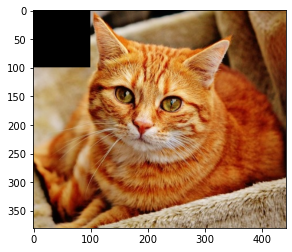

In [2]:
import cv2
import matplotlib.pyplot as plt
import time

image = cv2.imread('../images/cat.jpg')

start_time = time.time()
for i in range(0, 100):
    for j in range(0, 100):
        image[i, j] = [255, 255, 255]
print("--- %s seconds ---" % (time.time() - start_time))

start_time = time.time()
image[0:100, 0:100] = [0, 0, 0]
print("--- %s seconds ---" % (time.time() - start_time))

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

OpenCV를 활용한 ROI(Region of Interest: 관심 있는 영역) 추출

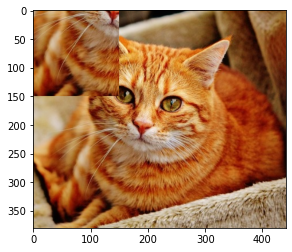

In [10]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('../images/cat.jpg')

# Numpy Slicing: ROI 처리 가능
roi = image[200:350, 50:200]

# ROI 단위로 이미지 복사하기
image[0:150, 0:150] = roi

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

OpenCV를 활용한 픽셀별 색상 다루기

In [13]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('../images/cat.jpg')
image[0, 0,:] = 0

print(image)


[[[  0   0   0]
  [101 120 147]
  [ 87 109 134]
  ...
  [ 40  90 142]
  [ 43  93 145]
  [ 39  91 144]]

 [[ 98 115 141]
  [ 90 110 135]
  [ 82 102 127]
  ...
  [ 43  93 145]
  [ 42  95 146]
  [ 44  96 149]]

 [[ 87 103 126]
  [ 86 103 124]
  [ 82  99 120]
  ...
  [ 40  95 146]
  [ 42  97 148]
  [ 44  99 150]]

 ...

 [[113 163 183]
  [118 165 186]
  [124 169 190]
  ...
  [104 128 150]
  [104 128 150]
  [116 140 160]]

 [[100 155 176]
  [106 159 180]
  [113 162 184]
  ...
  [101 124 146]
  [ 96 119 141]
  [107 128 149]]

 [[ 92 151 171]
  [ 97 154 175]
  [108 158 180]
  ...
  [104 127 149]
  [ 98 121 143]
  [ 93 114 135]]]


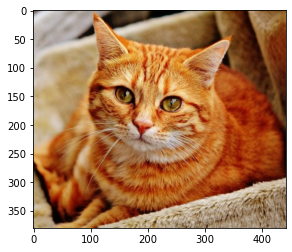

In [14]:

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

# ROI(Region Of Interest) 의 평균값으로 이미지 나타내기

src로 원본 이미지의 속성을 받아온 뒤,
src의 크기와 데이터 타입과 같은 0으로 채워진 dst를 생성해준다.

나눌 블록의 크기를 w * h로 설정하고 x, y는 
왼쪽 상단부터의 좌표를 나타낸다.

roi = src[y:y + h, x:x + w]는 
원본 영상의 ROI를 계산해 그 평균값을 계산한다.

평균값을 타나내는 것으로 N의 값이 커질수록 
원본 영상과 비슷해지고 N이 작을수록 
원본 영상의 전체 평균 값과 비슷해져 구분하기 어려워진다.

In [4]:
import cv2
import numpy as np 

src = cv2.imread('./images/cat.jpg')
dst = np.zeros(src.shape, dtype=src.dtype) 

N = 256
height, width, _ = src.shape

print(height, width)

h = height // N
w = width // N

for i in range(height):
    for j in range(width):
        y = i * h
        x = j * w
        roi = src[y:y + h, x:x + w]
        dst[y:y + h, x:x + w] = cv2.mean(roi)[0:3] #컬러이미지로 평균값

cv2.imshow('dst', dst)
cv2.waitKey() 
cv2.destroyAllWindows()
cv2.waitKey(1)

380 441


-1

# 마우스로 ROI 영역 나타내기

이미지가 생성된 뒤 원하는 영역을 마우스로 클릭하게 되면 해당 영역만 

선택되어 새로운 이미지가 생성된다.

그 후 생성된 이미지들을 모두 종료하면 해당 영역의 ROI 값이 출력되게 된다.

In [ ]:
import cv2
import matplotlib.pyplot 

In [5]:
import cv2

import matplotlib.pyplot as plt

src = cv2.imread('./images/cat.jpg')
roi = cv2.selectROI(src)

print('roi = ', roi)

img = src[roi[1]:roi[1] + roi[3], roi[0]:roi[0] + roi[2]]


cv2.imshow('img', img) 
cv2.waitKey() 
cv2.destroyAllWindows()
cv2.waitKey(1) #엔터 눌렀을때 윈도우창이 꺼지지않아서 추가

roi =  (152, 90, 268, 258)


# 마우스로 다중 ROI 영역 나타내기

cv2.selectROIs('src', src, False, True) src라는    
생성된 이미지에 격자 표시 않함(False),   
마우스 클릭 위치에서 드래그하여 박스 선택(True)을 설정해준다.

하나의 박스를 생성한 후, 엔터를 누르고 또 다른 박스를 생성하고   
esc를 누르면 선택한 다중 영역이 화면에 표시되고
해당 영역의 ROI값이 출력된다

In [1]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

src = cv2.imread('./images/cat.jpg')
rects = cv2.selectROIs('src', src, False, True)

print('rects: ', rects)

for r in rects:
    # 시작점 종료점, color
    cv2.rectangle(src, (r[0], r[1]), (r[0] + r[2], r[1] + r[3]), 255)
    
cv2.imshow('src', src) 
cv2.waitKey() 
cv2.destroyAllWindows()
cv2.waitKey(1) 

rects:  ()


-1